In [192]:
import re
import math
import copy
import csv
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd
from scipy.optimize import curve_fit

from __future__ import division

%matplotlib inline

## Read in fit results

In [193]:
fact = dict()
fact_err = dict()

In [194]:
typ = 'evgen'
factors = dict()
factors_err = dict()
input_file = 'results_cputype_task_cpu_%s_0.001.csv' % typ
with open(input_file) as csvfile:
    r = csv.reader(csvfile, delimiter=',')
    for row in r:
        (cpu, k, k_err) = row
        factors[cpu] = float(k)
        factors_err[cpu] = float(k_err)
fact[typ] = copy.deepcopy(factors)
fact_err[typ] = copy.deepcopy(factors_err)

In [195]:
typ = 'simul'
factors = dict()
factors_err = dict()
input_file = 'results_cputype_task_cpu_%s_0.001.csv' % typ
with open(input_file) as csvfile:
    r = csv.reader(csvfile, delimiter=',')
    for row in r:
        (cpu, k, k_err) = row
        factors[cpu] = float(k)
        factors_err[cpu] = float(k_err)
fact[typ] = copy.deepcopy(factors)
fact_err[typ] = copy.deepcopy(factors_err)

In [196]:
typ = 'pile'
factors = dict()
factors_err = dict()
input_file = 'results_cputype_task_cpu_%s_0.001.csv' % typ
with open(input_file) as csvfile:
    r = csv.reader(csvfile, delimiter=',')
    for row in r:
        (cpu, k, k_err) = row
        factors[cpu] = float(k)
        factors_err[cpu] = float(k_err)
fact[typ] = copy.deepcopy(factors)
fact_err[typ] = copy.deepcopy(factors_err)

In [197]:
typ = 'reprocessing'
factors = dict()
factors_err = dict()
input_file = 'results_cputype_task_cpu_%s_0.001.csv' % typ
with open(input_file) as csvfile:
    r = csv.reader(csvfile, delimiter=',')
    for row in r:
        (cpu, k, k_err) = row
        factors[cpu] = float(k)
        factors_err[cpu] = float(k_err)
fact[typ] = copy.deepcopy(factors)
fact_err[typ] = copy.deepcopy(factors_err)

In [229]:
typ = 'hc'
factors = dict()
factors_err = dict()
input_file = 'results_cputype_task_cpu_%s.csv' % typ
with open(input_file) as csvfile:
    r = csv.reader(csvfile, delimiter=',')
    for row in r:
        (cpu, k, k_err) = row
        factors[cpu] = float(k)
        factors_err[cpu] = float(k_err)
fact[typ] = copy.deepcopy(factors)
fact_err[typ] = copy.deepcopy(factors_err)

## Plot k factors fitted for each CPU

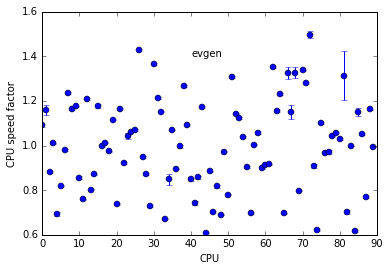

In [199]:
typ = 'evgen'

k_avg = dict()
k_std = dict()
x = list()
y = list()
yerr = list()
i = 0
for cpu in fact[typ].keys():
    x.append(i)
    y.append(fact[typ][cpu])
    yerr.append(fact_err[typ][cpu])
    i += 1
plt.figure()
plt.errorbar(x, y, yerr=yerr, fmt='o')
plt.xlabel('CPU')
plt.ylabel('CPU speed factor')
plt.text(40., 1.4, typ)

## Load HS06 values taken from HEPSPEC web site

In [200]:
df2 = pd.read_csv('HS06_ref.txt', names=['cpu', 'hs06', 'cores'])

In [201]:
hs = dict()
factors = fact[typ]
factors_err = fact_err[typ]
for row in df2.itertuples():
    cpu = row[1]
    a = row[2] / row[3]
    for cpu2 in factors.keys():
        if cpu in cpu2:
            hs[cpu2] = a

In [202]:
df = DataFrame({'k_avg': factors, 'k_std': factors_err, 'hs': hs}).sort_values(by='k_avg', inplace=False)

## Plot factors for CPUs with HS06 data, no correction

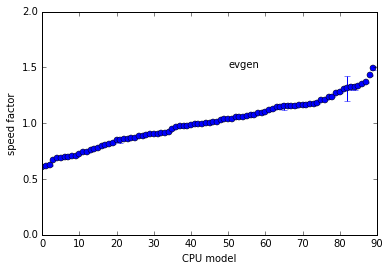

In [203]:
x = range(len(df))
y = df.k_avg
y_err = df.k_std
plt.errorbar(x, y, yerr=y_err, fmt='o')
plt.ylim([0., 2.])
plt.xlabel('CPU model')
plt.ylabel('speed factor')
plt.text(50., 1.5, typ)

## Plot factors for CPUs with HS06 data, with correction

(0.0, 2.0)

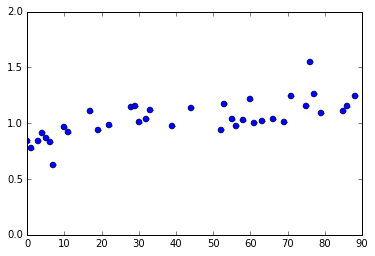

In [204]:
x = range(len(df))
y = df.k_avg / df.hs * 10.
y_err = df.k_std / df.hs * 10.
plt.errorbar(x, y, yerr=y_err, fmt='o')
plt.ylim([0., 2.])

## Plot correlation between CPU speed factors and HS06/core

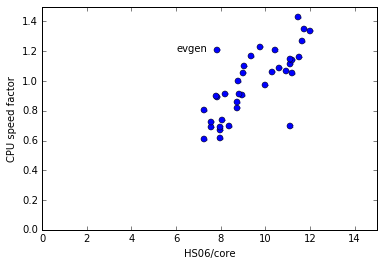

In [205]:
x = df.hs
y = df.k_avg
y_err = df.k_std
plt.errorbar(x, y, yerr=y_err, fmt='o')
plt.xlabel('HS06/core')
plt.ylabel('CPU speed factor')
plt.xlim([0., 15.])
plt.ylim([0., 1.5])
plt.text(6., 1.2, typ)

## Plot correlation between factors for evgen and simul

101.0


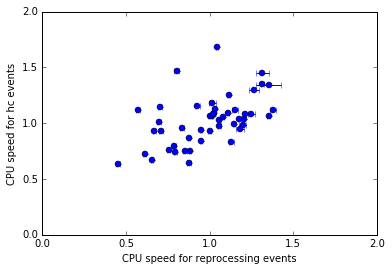

In [230]:
type1 = 'reprocessing'
type2 = 'hc'
fact1 = fact[type1]
fact2 = fact[type2]
fact1_err = fact_err[type1]
fact2_err = fact_err[type2]
#print fact2['Intel(R) Xeon(R) CPU E5-2640 v2 @ 2.00GHz 4096 KB']
x = list()
y = list()
x_err = list()
y_err = list()
s1 = set(fact1.keys())
s2 = set(fact2.keys())
s = s2.intersection(s1)
for cpu in s:
#    print '%s\t%s\t%s' % (cpu, fact1[cpu], fact2[cpu])
    x.append(fact1[cpu])
    x_err.append(fact1_err[cpu])
    y.append(fact2[cpu])
    y_err.append(fact2_err[cpu])
plt.xlim([0., 2.])
plt.ylim([0., 2.])
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o')
plt.xlabel('CPU speed for %s events' % type1)
plt.ylabel('CPU speed for %s events' % type2)
print np.nansum(fact2.values())

In [226]:
print np.corrcoef(x, y, 0)

[[ 1.        0.518043]
 [ 0.518043  1.      ]]


## Fit to a straight line

In [227]:
def f(x, a, b):
    return a * x + b

res = curve_fit(f, x, y)

print "The slope of the linear fit is %f +- %f" % (res[0][0], np.sqrt(res[1][0][0]))
print "The intercept of the linear fit is %f +- %f" % (res[0][1], np.sqrt(res[1][1][1]))

The slope of the linear fit is 0.505303 +- 0.123014
The intercept of the linear fit is 0.523061 +- 0.125022


0.0387210768413


(array([ 19.,  19.,   8.,   7.,   2.,   4.,   4.,   1.,   0.,   1.]),
 array([ 0.00370641,  0.0229396 ,  0.04217278,  0.06140596,  0.08063915,
         0.09987233,  0.11910552,  0.1383387 ,  0.15757188,  0.17680507,
         0.19603825]),
 <a list of 10 Patch objects>)

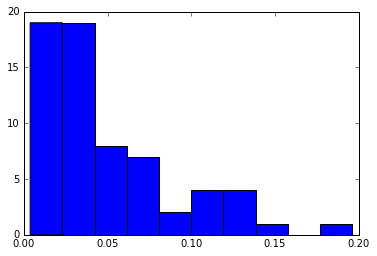

In [251]:
types = ['evgen', 'simul', 'pile', 'reprocessing', 'hc']
types = ['evgen', 'simul', 'pile']
s = set(fact[types[0]].keys())
stds = list()
for typ in types:
    f = fact[typ]
    s = s.intersection(set(f.keys()))
for cpu in s:
    x = [fact[typ][cpu] for typ in types]
    stds.append(np.std(x))
print np.median(stds)
plt.hist(stds)